<a href="https://colab.research.google.com/github/sapthagiri70/Blimp-Project/blob/main/Delivarable%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

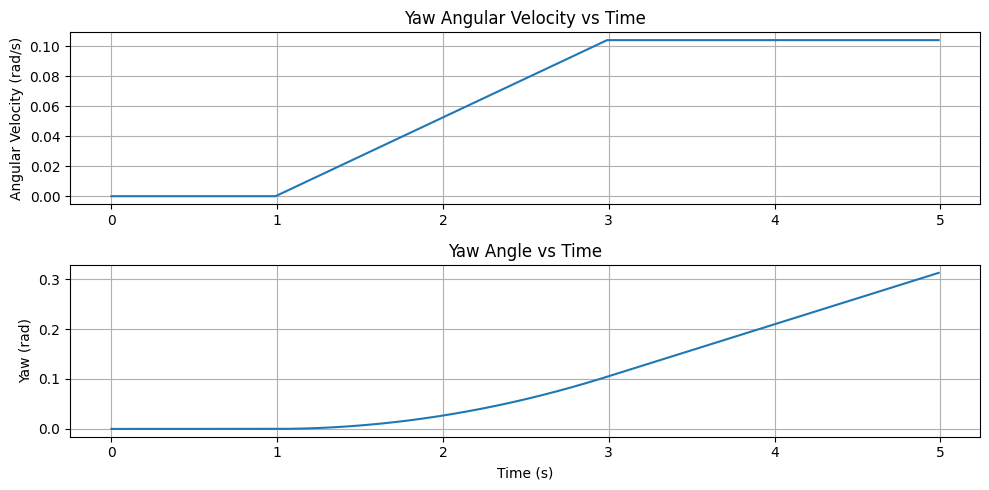

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (replace with actual values)
Iz = 0.05  # kg·m² (placeholder)
r = 0.13   # Distance from center to motors in meters
k_thrust = 0.02  # N per unit input (placeholder)

# Time settings
dt = 0.01  # time step
t_end = 5  # seconds
time = np.arange(0, t_end, dt)

# Motor input profile (example: pulse to right motor)
input_left = np.zeros_like(time)
input_right = np.zeros_like(time)
input_right[100:300] = 1.0  # simulate 2 seconds of thrust imbalance

# Initialize angular velocity and yaw angle
omega = np.zeros_like(time)
yaw = np.zeros_like(time)

# Simulate dynamics
for i in range(1, len(time)):
    # Compute thrusts
    TL = k_thrust * input_left[i]
    TR = k_thrust * input_right[i]

    # Compute net torque
    torque = (TR - TL) * r

    # Angular acceleration
    alpha = torque / Iz

    # Integrate to get angular velocity and yaw
    omega[i] = omega[i-1] + alpha * dt
    yaw[i] = yaw[i-1] + omega[i] * dt

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(time, omega)
plt.title("Yaw Angular Velocity vs Time")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid()

plt.subplot(2,1,2)
plt.plot(time, yaw)
plt.title("Yaw Angle vs Time")
plt.ylabel("Yaw (rad)")
plt.xlabel("Time (s)")
plt.grid()
plt.tight_layout()
plt.show()
